Información adicional

Las muestras llegan periódicamente a medida que el Dr. Wolberg informa de sus casos clínicos. Por lo tanto, la base de datos refleja esta agrupación cronológica de los datos. Esta información de agrupación aparece inmediatamente debajo, habiéndose eliminado de los propios datos:

Grupo 1: 367 instancias (enero de 1989)<br>
Grupo 2: 70 casos (octubre de 1989)<br>
Grupo 3: 31 casos (febrero de 1990)<br>
Grupo 4: 17 casos (abril de 1990)<br>
Grupo 5: 48 casos (agosto de 1990)<br>
Grupo 6: 49 casos (actualizado en enero de 1991)<br>
Grupo 7: 31 casos (junio de 1991)<br>
Grupo 8: 86 casos (noviembre de 1991)<br>

Total: 699 puntos (a partir de la base de datos donada el 15 de julio de 1992)

Tenga en cuenta que los resultados resumidos anteriormente en Uso anterior se refieren a un conjunto de datos de tamaño 369, mientras que el Grupo 1 tiene solo 367 instancias. Esto se debe a que originalmente contenía 369 instancias; Se eliminaron 2. Las siguientes declaraciones resumen los cambios en el conjunto de datos del Grupo 1 original:

Grupo 1 : 367 puntos: 200B 167M (enero de 1989)

Revisado el 10 de enero de 1991: Se reemplazaron los núcleos desnudos cero en 1080185 y 1187805

Revisado el 22 de noviembre de 1991: Eliminado 765878,4,5,9,7,10,10,10,3,8,1 sin registro
: Eliminado 484201,2,7,8,8,4,3,10,3,4,1 cero epitelial
: Se ha cambiado de 0 a 1 en el campo 6 del 1219406 de muestra
: Se cambió 0 a 1 en el campo 8 de la siguiente muestra:
: 1182404,2,3,1,1,1,2,0,1,1,1

¿Faltan valores?

Sí

Información adicional de las variables

1. Número de código de muestra: número de identificación
2. Espesor del grupo: 1 - 10
3. Uniformidad del tamaño de la celda: 1 - 10
4. Uniformidad de la forma de la celda: 1 - 10
5. Adherencia marginal: 1 - 10
6. Tamaño de célula epitelial única: 1 - 10
7. Núcleos desnudos: 1 - 10
8. Cromatina blanda: 1 - 10
9. Nucleolos normales: 1 - 10
10. Mitosis: 1 - 10
11. Clase: (2 para benigno, 4 para maligno)

Etiquetas de clase

2 = benigno, 4 = maligno

# Importar Librerias

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar conjuntos de datos

In [23]:
# Lista de nombres de columnas
column_names = [
    'ID',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class'
]

In [24]:
df = pd.read_csv("./breast-cancer-wisconsin.data", names=column_names)
df.head()


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Limpiar y convertir datos

In [25]:
# Realizar actualizaciones específicas en el conjunto de datos según las instrucciones

# 1. Reemplazar los valores de "núcleos desnudos" en las muestras 1080185 y 1187805
df.loc[df['ID'] == 1080185, 'Bare Nuclei'] = 1
df.loc[df['ID'] == 1187805, 'Bare Nuclei'] = 1

# 2. Eliminar las muestras con los números 765878 y 484201
df = df[~df['ID'].isin([765878, 484201])]

# 3. Actualizar el valor en el campo 6 de la muestra 1219406 de 0 a 1
df.loc[df['ID'] == 1219406, 'Single Epithelial Cell Size'] = 1

# 4. Actualizar el valor en el campo 8 de la muestra 1182404 de 0 a 1
df.loc[df['ID'] == 1182404, 'Bland Chromatin'] = 1

# Verificar los cambios realizados
df.loc[df['ID'].isin([1080185, 1187805, 1219406, 1182404])]

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
36,1080185,10,10,10,8,6,1,8,9,1,4
136,1182404,4,1,1,1,2,1,1,1,1,2
149,1187805,8,8,7,4,10,1,7,8,7,4
209,1219406,5,1,1,1,1,1,3,1,1,2
256,1182404,3,1,1,1,2,1,1,1,1,2
257,1182404,3,1,1,1,2,1,1,1,1,2
265,1182404,5,1,4,1,2,1,1,2,1,2
448,1182404,1,1,1,1,1,1,1,1,1,2
497,1182404,4,2,1,1,2,1,1,1,1,2


In [26]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')
df.dropna(inplace=True)  # Eliminar filas con valores faltantes

# Separar características y etiquetas
X = df.drop(['ID', 'Class'], axis=1)
y = df['Class']

# Cambiar etiquetas a 0 (benigno) y 1 (maligno)
y = y.map({2: 0, 4: 1})

# Mostrar información sobre los datos limpios
X.info()
y.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              683 non-null    int64  
 1   Uniformity of Cell Size      683 non-null    int64  
 2   Uniformity of Cell Shape     683 non-null    int64  
 3   Marginal Adhesion            683 non-null    int64  
 4   Single Epithelial Cell Size  683 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              683 non-null    int64  
 7   Normal Nucleoli              683 non-null    int64  
 8   Mitoses                      683 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 53.4 KB


Class
0    444
1    239
Name: count, dtype: int64

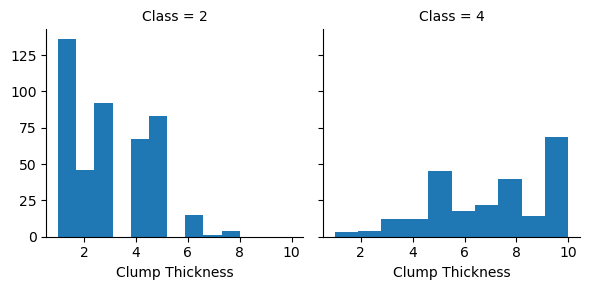

In [27]:
hist = sns.FacetGrid(df, col= 'Class')
hist.map(plt.hist, 'Clump Thickness', bins = 10)

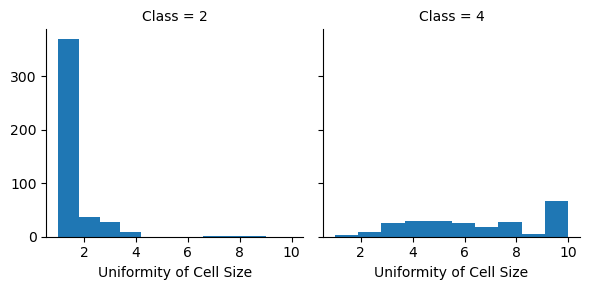

In [28]:
hist = sns.FacetGrid(df, col= 'Class')
hist.map(plt.hist, 'Uniformity of Cell Size', bins = 10)

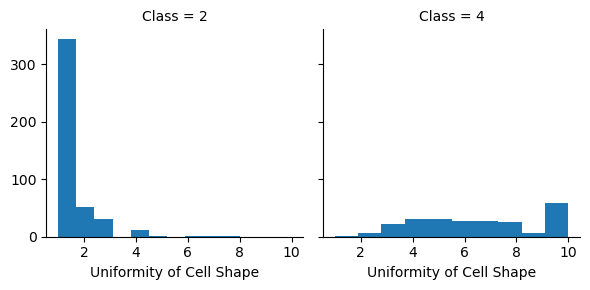

In [29]:
hist = sns.FacetGrid(df, col= 'Class')
hist.map(plt.hist, 'Uniformity of Cell Shape', bins = 10)

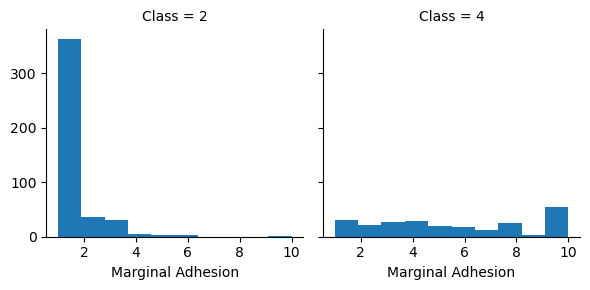

In [30]:
hist = sns.FacetGrid(df, col= 'Class')
hist.map(plt.hist, 'Marginal Adhesion', bins = 10)

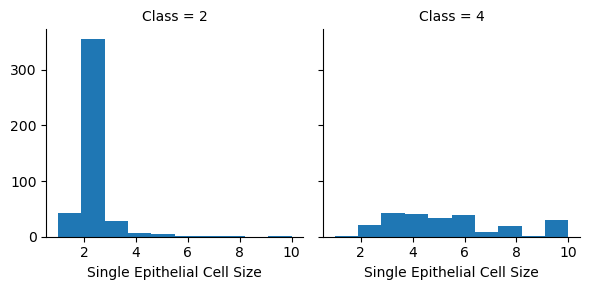

In [31]:
hist = sns.FacetGrid(df, col= 'Class')
hist.map(plt.hist, 'Single Epithelial Cell Size', bins = 10)

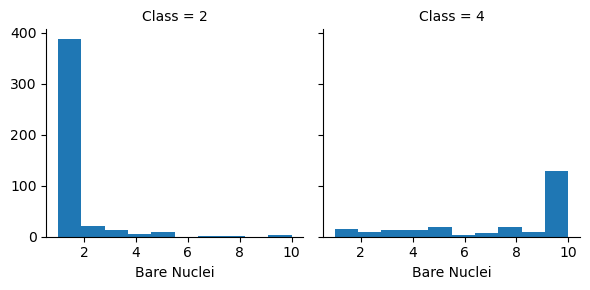

In [32]:
hist = sns.FacetGrid(df, col= 'Class')
hist.map(plt.hist, 'Bare Nuclei', bins = 10)

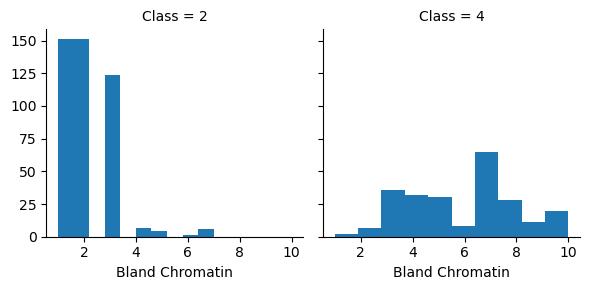

In [33]:
hist = sns.FacetGrid(df, col= 'Class')
hist.map(plt.hist, 'Bland Chromatin', bins = 10)

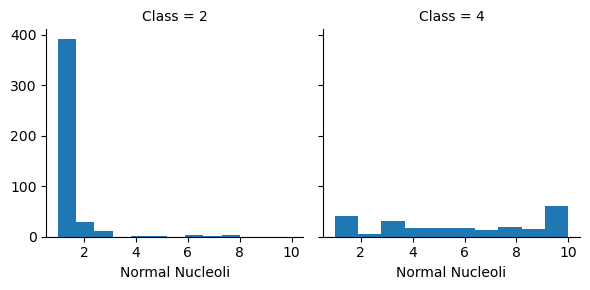

In [34]:
hist = sns.FacetGrid(df, col= 'Class')
hist.map(plt.hist, 'Normal Nucleoli', bins = 10)

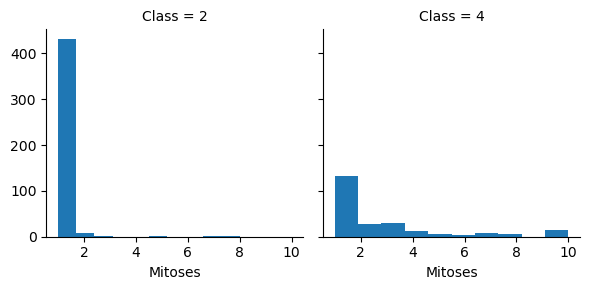

In [35]:
hist = sns.FacetGrid(df, col= 'Class')
hist.map(plt.hist, 'Mitoses', bins = 10)

# Entrenar el Modelo

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


<h3>Dividir los datos</h3>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
RandomForest= RandomForestClassifier(n_estimators=1000, random_state=0)

# Entrenar el modelo
RandomForest.fit(X_train, y_train)
y_pred = RandomForest.predict(X_test)


In [39]:
confusion_matrix(y_test, y_pred)

array([[78,  1],
       [ 4, 54]], dtype=int64)

In [42]:
print('Precisión: ', precision_score(y_test, y_pred))
print('Memoria: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print(f"Efectividad: {round(accuracy_score(y_test, y_pred)*100,1 )}% de efectividad")

Precisión:  0.9818181818181818
Memoria:  0.9310344827586207
F1 Score:  0.9557522123893806
Efectividad: 96.4% de efectividad
